In [1]:
# Managing the working directory. 
# NOTE: You DON'T want to change this. 
import sys
from pathlib import Path

p = Path("").cwd().parent.as_posix()
if p not in sys.path:
    sys.path.append(p)

In [2]:
%%time
import src as dp

CPU times: user 12.7 ms, sys: 2.19 ms, total: 14.9 ms
Wall time: 24.5 ms


In [3]:
try:
    from .. import src as dp
except ImportError:
    import src as dp
print(dp.__version__, dp.__all__)

0.0.2 ['figure', 'data', 'PlotData', 'Histogram', 'LineChart', 'PlotSettings', 'PlotSetter', 'DataSetter', 'FigWrapper', 'AxesWrapper']


In [4]:
import numpy as np

np.random.seed(42)
x1 : np.ndarray = np.random.randn(1000) 
x2 : np.ndarray = np.random.randn(1000) 
x3 : np.ndarray = np.random.randn(1000) 

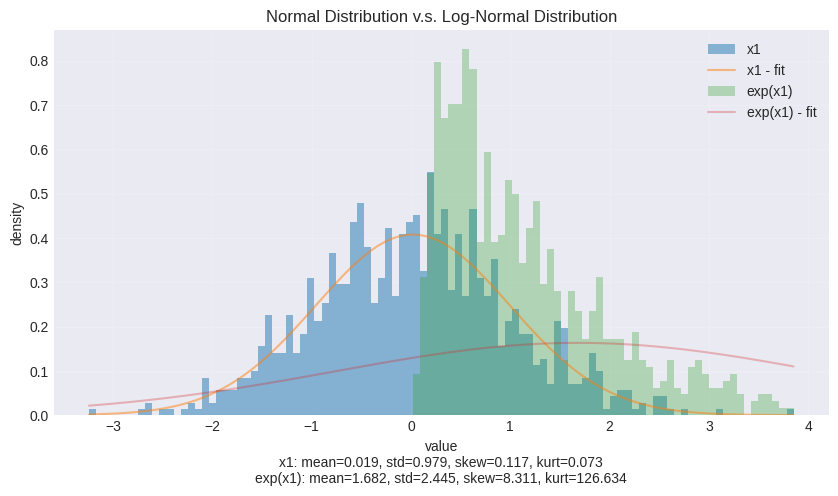

In [5]:
d1 = dp.data(x1)
d2 = dp.data(x1).exp().set_plot(alpha=0.3)
d1.join(d2).set_plot(title="Normal Distribution v.s. Log-Normal Distribution").hist()

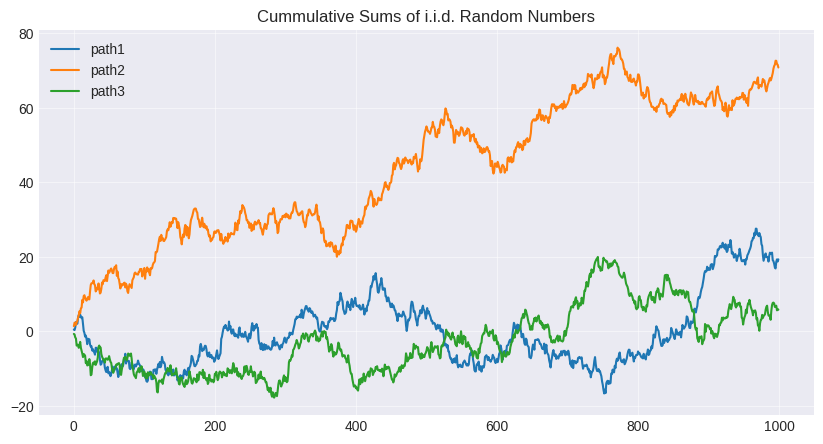

In [6]:
d = dp.data([x1, x2, x3]).cumsum().set_label(["path1", "path2", "path3"])
d.set_plot(title="Cummulative Sums of i.i.d. Random Numbers").plot()